In [1]:
import math
import random
import numpy as np
import scipy
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline 
import pylab
from PIL import Image

In [2]:
mnist = scipy.io.loadmat("./mnist_data/images.mat")

#print(mnist)

mnist_data = mnist["images"].reshape((784, 60000))

def visualize(data, dim1, dim2):
    fig = plt.figure(figsize=(6, 3.2))

    ax = fig.add_subplot(111)
    ax.set_title('colorMap')
    plt.imshow(data.reshape((dim1,dim2)))

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.patch.set_alpha(0)
    cax.set_frame_on(False)
    plt.colorbar(orientation='vertical')
    plt.show()
    
#visualize(mnist_data[50000])
#visualize(mnist_data[50001])
#visualize(mnist_data[30001])

c:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


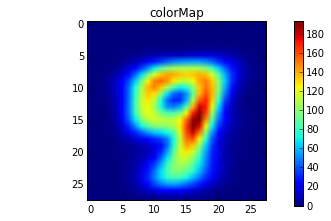

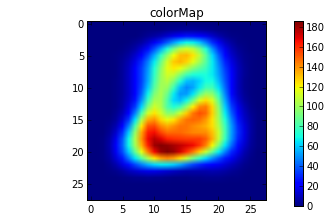

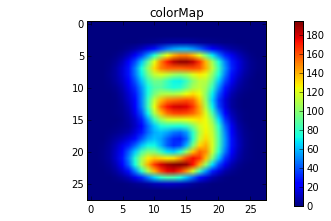

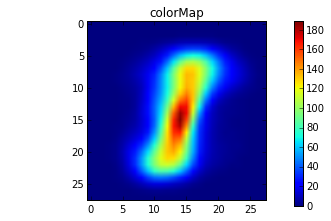

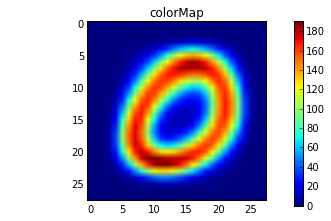

-----


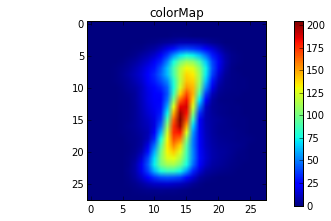

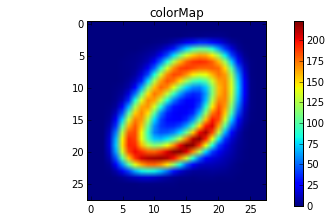

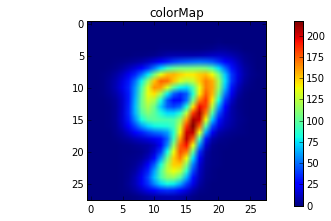

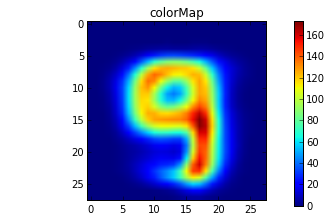

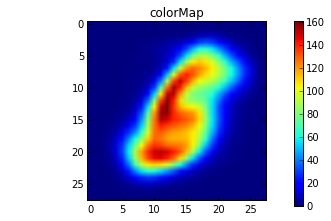

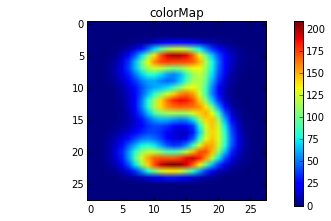

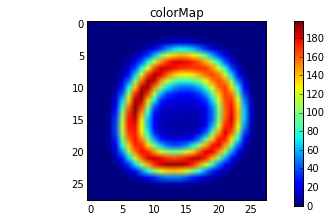

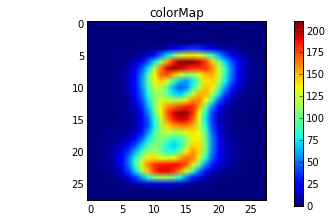

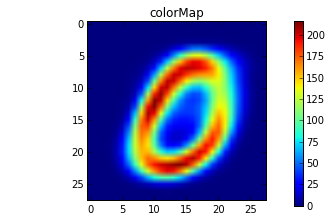

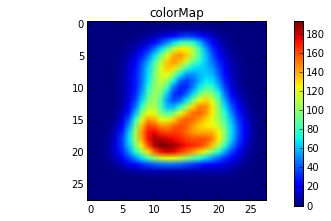

-----


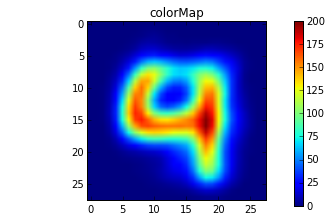

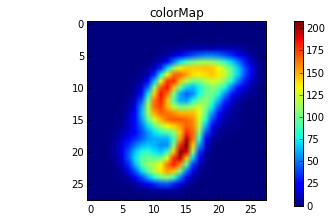

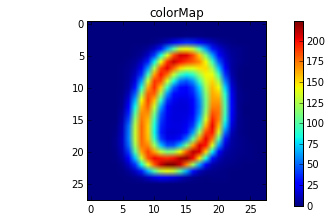

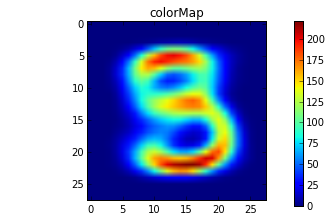

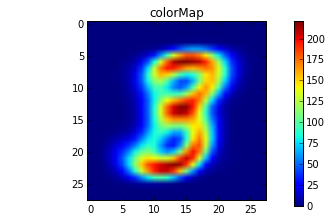

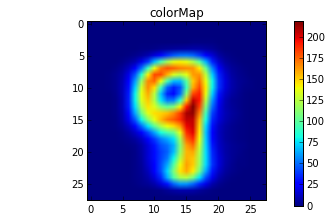

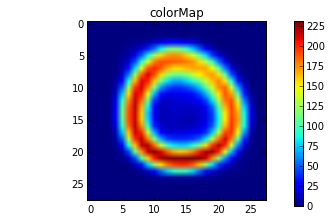

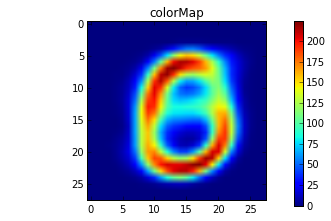

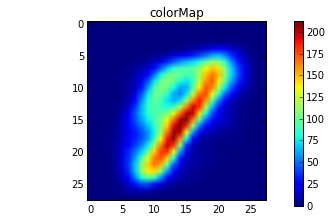

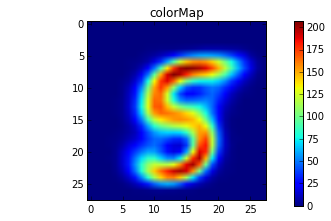

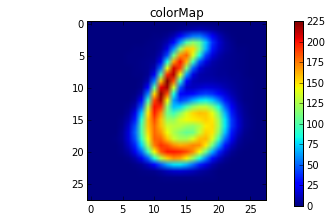

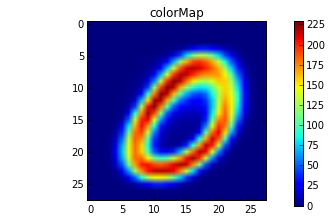

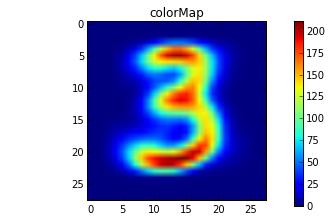

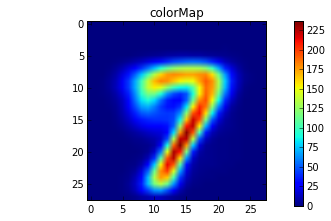

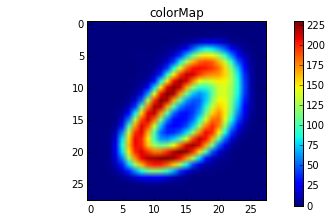

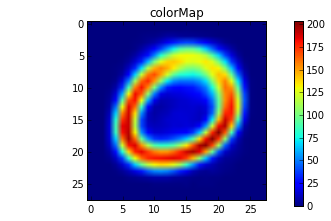

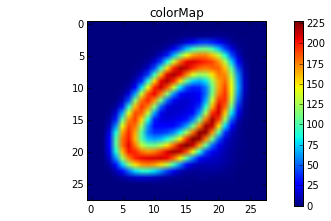

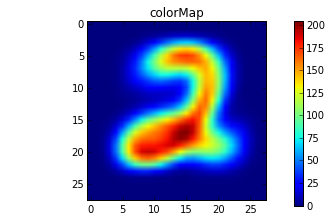

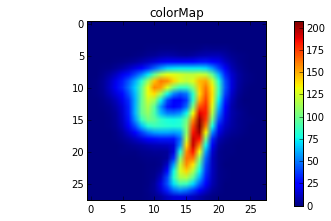

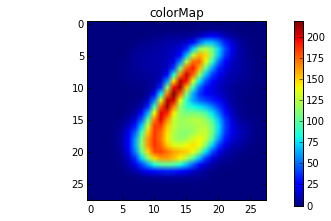

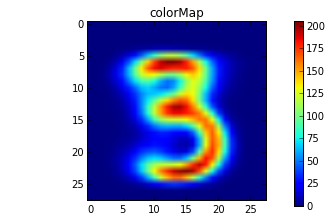

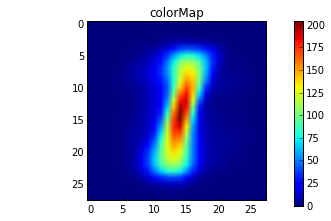

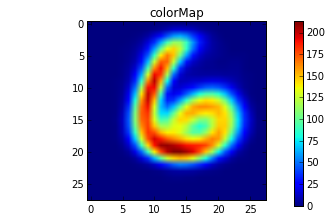

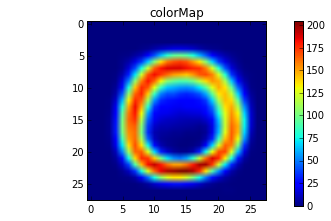

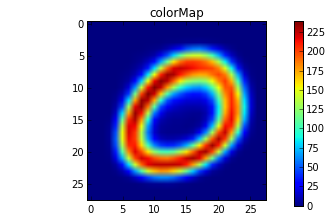

In [3]:
def kMeans(data, k = 5, iterations = 10):
    #Initialize k number of means as k random points in the data
    means = []
    usedIndices = []
    dataT = np.transpose(data)
    for _ in range(k):
        while True:
            index = int(random.random() * len(data))
            if index not in usedIndices:
                usedIndices.append(index)
                means.append(dataT[index])
                break
                
    for _ in range(iterations):            
        #print(means)
        #Assign points to various means
        #First, for every mean, stack the mean vertically
        distArrays = []
        for mean in means:
            signedDist = dataT - mean
            dist = np.square(signedDist)
            dist = np.sum(dist, axis=1)
            distArrays.append(dist)
            
        #Reclassify the points by minimum distance
        newClusters = [[] for _ in range(k)]

        for dataIndex in range(len(dataT)):
            minIndex = -1
            minDist = 0
            for i in range(k):
                if minIndex == -1 or distArrays[i][dataIndex] < minDist:
                    minIndex = i
                    minDist = distArrays[i][dataIndex]
            newClusters[minIndex].append(dataIndex)
            
        oldMean = means[0]    
            
        #Recalculate the means based on the newly generated clusters
        means = []
        for newCluster in newClusters:
            mean = np.zeros(shape=(784,))
            for dataIndex in newCluster:
                dataPoint = dataT[dataIndex]
                mean = np.add(mean, dataPoint)
            if len(newCluster) == 0:
                pass
            else:
                mean = np.dot(mean, 1.0/(len(newCluster)))
            means.append(mean)
    
    return means
    
finalResult = kMeans(mnist_data, 5, 30)
for result in finalResult:
    visualize(result, 28, 28)

print("-----")    
    
finalResult = kMeans(mnist_data, 10, 15)
for result in finalResult:
    visualize(result, 28, 28)
    
print("-----")      
    
finalResult = kMeans(mnist_data, 25, 10)
for result in finalResult:
    visualize(result, 28, 28)

#x = np.array([[1,2,3],[4,5,6],[1,2,4],[5,6,7],[100,100,100],[100,101,100]])
#print(mnist_data.shape)
#x = np.transpose(x)
#print(x.shape)

#kMeans(x, 3, 10)


[14202.694145021645, 1249.9807560134923, 698.12939794081751, 519.29542974000151, 388.7910338256051, 293.71714823889249, 242.69735805395132, 205.76706597643246, 174.73866264144613, 145.23897593483179, 126.73476083456319, 108.76178134740468, 96.988131390941604, 87.6758336039846, 78.69778056872893, 70.755036394413736, 63.912896550913516, 58.105139594694734, 52.914600529242385, 48.577029611070046, 44.3669197618756, 40.862010234785409, 37.982239850088455, 35.169033711093725, 32.739111393559185, 30.578150559435795, 28.641066604974768, 26.946021925650943, 25.363040219243526, 23.815057762173328, 22.340528706031396, 21.040977389786949, 19.806924070128503, 18.728152334770538, 17.723059893401125, 16.770848735932621, 15.85820708894426, 15.032169244621496, 14.253235027831039, 13.545772561621213, 12.863528539390309, 12.21300500490166, 11.597910084024063, 11.04842003853075, 10.535233243502258, 10.053911263467317, 9.5909521661932224, 9.1411749606338493, 8.7019988745219781, 8.2954440763917923, 7.895092

c:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


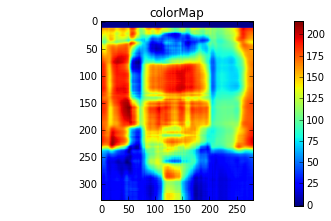

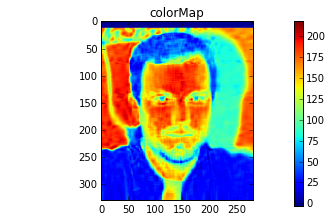

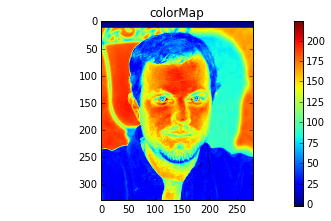

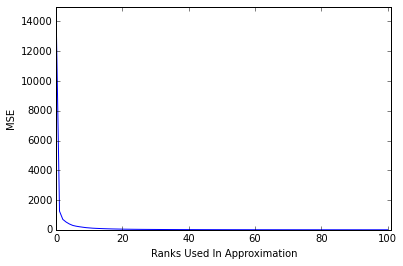

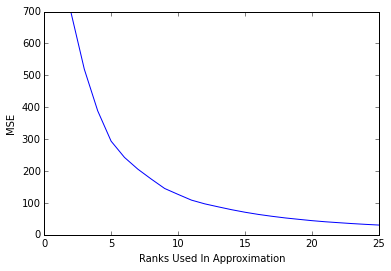

In [5]:
face = Image.open('./low-rank_data/face.jpg').convert('L')
faceMatrix = np.asarray(face)

u,s,v = np.linalg.svd(faceMatrix, full_matrices = False, compute_uv = True)
s = np.diagflat(s)

ranks = [i for i in range(101)]
rankApprox = []
mseData = []

for rank in ranks:
    sCopy = np.zeros((280, 280))
    
    for i in range(rank):
        sCopy[i][i] = s[i][i]
        
    test = np.dot(u, np.dot(sCopy, v))
    rankApprox.append(test) 
    
    mse = ((test - faceMatrix) ** 2).mean(axis=None)
    mseData.append(mse)
    
    #visualize(faceMatrix, 330, 280)

print(mseData)
visualize(rankApprox[5], 330, 280)
visualize(rankApprox[20], 330, 280)
visualize(rankApprox[100], 330, 280)

xData = [i for i in range(101)]

plt.plot(xData, mseData, 'b-')
plt.axis([0, 101, 0, 15000])
plt.xlabel('Ranks Used In Approximation')
plt.ylabel('MSE')
plt.show()

plt.plot(xData, mseData, 'b-')
plt.axis([0, 25, 0, 700])
plt.xlabel('Ranks Used In Approximation')
plt.ylabel('MSE')
plt.show()


c:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


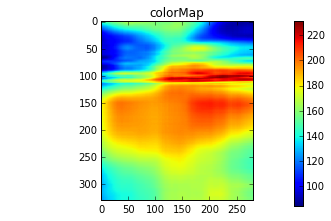

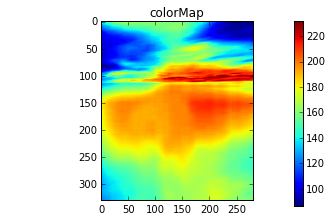

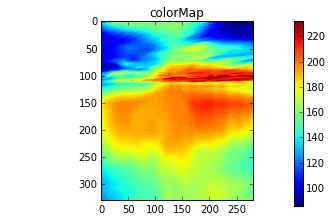

In [6]:
sky = Image.open('./low-rank_data/sky.jpg').convert('L')
skyMatrix = np.asarray(sky)
    
u,s,v = np.linalg.svd(skyMatrix, full_matrices = False, compute_uv = True)
s = np.diagflat(s)

def approxSvd(u, s, v, rank):
    sCopy = np.zeros(s.shape)
    for i in range(rank):
        sCopy[i][i] = s[i][i]
    test = np.dot(u, np.dot(sCopy, v))
    return test

ranks = [i for i in range(101)]
rankApprox2 = []

for rank in ranks:
    test = approxSvd(u, s, v, rank)
    rankApprox2.append(test) 

visualize(rankApprox2[5], 330, 280)
visualize(rankApprox2[20], 330, 280)
visualize(rankApprox2[100], 330, 280)

c:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


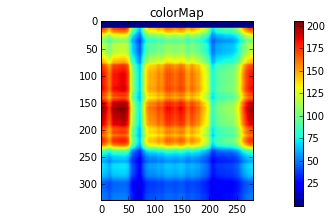

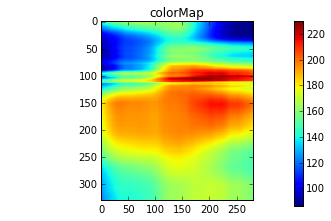

In [7]:
visualize(rankApprox[1], 330, 280)
visualize(rankApprox2[3], 330, 280)

In [8]:
jokes = scipy.io.loadmat("./joke_data/joke_train.mat")["train"]
#24983, 100

zero_replaced_jokes = np.array(jokes)

for r in range(jokes.shape[0]):
    for c in range(jokes.shape[1]):
        if math.isnan(zero_replaced_jokes[r][c]):
            zero_replaced_jokes[r][c] = 0

u,s,v = np.linalg.svd(zero_replaced_jokes, full_matrices = False, compute_uv = True)      

s = np.diagflat(s)

#root_s = scipy.linalg.sqrtm(s)

#p_u = np.dot(u, np.transpose(root_s))
#q_i = np.dot(s, np.transpose(v))

#result = np.dot(p_u, q_i)

#print(result)
#print(result.shape)

ranks = [2,5,10,20]

#original may contain nan values
def possibleNanMse(prediction, original):
    assert prediction.shape == original.shape
    error = 0
    for r in range(prediction.shape[0]):
        for c in range(prediction.shape[1]):
            if math.isnan(original[r][c]):
                continue
            error += math.pow(prediction[r][c] - original[r][c], 2.0)
    return error

#print(possibleNanMse(result, zero_replaced_jokes))
 
for rank in ranks:    
    result = approxSvd(u, s, v, rank)
    
    accuracy = 0

    def sign(x):
        if x < 0:
            return -1
        elif x > 0:
            return 1
        return 0

    for r in range(result.shape[0]):
        for c in range(result.shape[1]):
            if sign(zero_replaced_jokes[r][c]) == sign(result[r][c]):
                accuracy += 1

    totalCount = 0            
    for r in range(result.shape[0]):
        for c in range(result.shape[1]):
            if zero_replaced_jokes[r][c] != 0:
                totalCount += 1

    mse = possibleNanMse(result, jokes)            
                
    print("Accuracy: " + str(accuracy / totalCount) + ", MSE: " + str(mse))
    

Accuracy: 0.7330861590536545, MSE: 18441623.017882064
Accuracy: 0.7654931248877068, MSE: 16333384.420196982
Accuracy: 0.7944708525849047, MSE: 14165432.758000363
Accuracy: 0.8287266347107218, MSE: 11304007.43972935


In [9]:
def getPredictions(d, lambda_factor):
    
    U = np.random.random((24983, d))
    V = np.random.random((100, d))
    #R = scipy.io.loadmat("./joke_data/joke_train.mat")["train"]
    R = zero_replaced_jokes

    #lambda_factor = 0.1
    #lambda_factors = np.arange(0.05, 1.05, 0.05)
    lambda_factors = [0.05]

    for _ in range(35):
        vtv = np.dot(np.transpose(V), V)
        li = np.dot(np.identity(d), lambda_factor)
        arr = np.add(vtv, li)
        inverseArr = np.linalg.inv(arr)
        rightSide = np.dot(V, inverseArr)

        #print(R[0].shape, rightSide.shape)

        for i in range(24983):
            U[i] = np.dot(R[i], rightSide) 

        utu = np.dot(np.transpose(U), U)
        li = np.dot(np.identity(d), lambda_factor)
        arr = np.add(utu, li)
        inverseArr = np.linalg.inv(arr)
        rightSide = np.dot(U, inverseArr)

        rT = np.transpose(R)

        #print(rT[0].shape, rightSide.shape)

        for i in range(100):
            V[i] = np.dot(rT[i], rightSide) 

    accuracy = 0
    count = 0
    predictions = np.ndarray((24983,100))

    for r in range(24983):
        for c in range(100):
            prediction = np.dot(np.transpose(U[r]), V[c])
            predictions[r][c] = prediction
            if math.isnan(jokes[r][c]):
                continue
            count += 1
            if sign(prediction) == sign(R[r][c]):
                accuracy += 1

    mse = possibleNanMse(predictions, R)            
                
    print("Testing Accuracy: " + str(accuracy / count) + ", MSE: " + str(mse) + ", with lambda: " + str(lambda_factor))
    print("as well as dimensions: " + str(d))
    
    return predictions

In [10]:
def testValidationAccuracy(predictions):
    fname = "./joke_data/validation.txt"

    with open(fname) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content] 

    accuracy = 0
    count = len(content)

    for stringy in content:
        tokens = stringy.split(",")
        r = int(tokens[0]) - 1
        c = int(tokens[1]) - 1
        prediction = predictions[r][c]
        actual = int(tokens[2])

        if prediction >= 0 and actual == 1:
            accuracy += 1
        elif prediction < 0 and actual == 0:
            accuracy += 1

    print("Validation Accuracy: " + str(accuracy / count))

In [11]:
def writePredictionsToFile(predictions):

    fname = "./joke_data/query.txt"

    with open(fname) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content] 

    f = open("./joke_data/kaggle_submission_new.txt", 'w')

    f.write("Id,Category\n")

    for i in range(len(content)):
        stringy = content[i]
        tokens = stringy.split(",")
        queryId = int(tokens[0])
        r = int(tokens[1]) - 1
        c = int(tokens[2]) - 1
        prediction = predictions[r][c]
        output = str(queryId) + ","
        if prediction >= 0:
            f.write(output + '1\n')
        else:
            f.write(output + '0\n')

    f.close()

In [12]:
dimensions = [x for x in range(3,25,1)]
lambda_factors = [0.05]

for dimension in dimensions:
    for lambda_factor in lambda_factors:
        pred = getPredictions(dimension, lambda_factor)
        testValidationAccuracy(pred)
        #writePredictionsToFile(pred)
        print("---------")
        
pred = getPredictions(9, 0.05)
writePredictionsToFile(pred)

Testing Accuracy: 0.7403522506623498, MSE: 20259149.723706864, with lambda: 0.05
as well as dimensions: 3
Validation Accuracy: 0.705420054200542
---------
Testing Accuracy: 0.7531016546581214, MSE: 19723664.41929251, with lambda: 0.05
as well as dimensions: 4
Validation Accuracy: 0.7168021680216802
---------
Testing Accuracy: 0.7633664176496866, MSE: 19265827.69679266, with lambda: 0.05
as well as dimensions: 5
Validation Accuracy: 0.7170731707317073
---------
Testing Accuracy: 0.7708944265311448, MSE: 18839064.388262525, with lambda: 0.05
as well as dimensions: 6
Validation Accuracy: 0.7127371273712737
---------
Testing Accuracy: 0.7770988416066239, MSE: 18461998.086129453, with lambda: 0.05
as well as dimensions: 7
Validation Accuracy: 0.7154471544715447
---------
Testing Accuracy: 0.7821112482252565, MSE: 18106468.7114066, with lambda: 0.05
as well as dimensions: 8
Validation Accuracy: 0.718970189701897
---------
Testing Accuracy: 0.7871524045840355, MSE: 17757653.415386453, with la